In [1]:
from RBC import BaseGradientBoostingClassifier 
from RBC import RandomBoostingClassifier

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble._forest import ForestClassifier 
from sklearn.utils.validation import check_is_fitted, check_X_y, check_array, column_or_1d

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  
from sklearn.tree import DecisionTreeClassifier, plot_tree  

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score 
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.validation import check_is_fitted
from sklearn.utils import check_random_state

import warnings
from sklearn.exceptions import DataConversionWarning

# Установка фильтра до импорта scikit-learn
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

/home/pkonoplev/.pyenv/versions/mylightautoml/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


# Подготовка Данных

In [3]:
df = pd.read_csv('UCI_Credit_Card.csv') 
X = df.drop(['default.payment.next.month'], axis = 1)
y = df['default.payment.next.month'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

In [4]:
df = pd.read_csv('UCI_Credit_Card.csv') 
X = df.drop(['default.payment.next.month'], axis = 1)
y = df['default.payment.next.month'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

def f1(x1, x2, x3): 
    a = x1 
    b = (x2+x3)/2  
    if a == b and a == 0: 
        return 0 
    else:
        return (a - b)/max(abs(a), abs(b)) 

def f2(x1, x2, x3): 
    a = x1 
    b = (x2+x3)/2 
     
    return a - b  
df['new_feature_1'] = df.apply(lambda x: f1(x['BILL_AMT1'], x['BILL_AMT2'],  x['BILL_AMT3'] ), axis = 1) 
df['new_feature_2'] = df.apply(lambda x: f2(x['BILL_AMT1'], x['BILL_AMT2'],  x['BILL_AMT3'] ), axis = 1)   
df['new_feature_1_2_equal_zero'] = df.apply(lambda x: int( x['BILL_AMT1'] == (x['BILL_AMT2'] + x['BILL_AMT3'] )/2 and  x['BILL_AMT1'] == 0 ), axis = 1) 
df_class_1 = df[df['default.payment.next.month'] == 1].sample(5051, random_state=42)
df_class_0 = df[df['default.payment.next.month'] == 0].sample(5051, random_state=42)
df_ = pd.concat([df_class_0, df_class_1]).sample(frac=1, random_state=42).reset_index(drop=True).dropna() 
df_ = shuffle(df_, random_state=42).drop(["ID"], axis = 1)



# 
GridSearchCV

In [5]:
param_grid = {
    'n_estimators': [10],
    'gb_n_estimators': [1, 2,3,5,10,15,20],
    'learning_rate': [0.1],
    'max_depth': [4],
    'max_features': ['sqrt'],
}


model = RandomBoostingClassifier(
    random_state=42,
    n_jobs=-1
)

# Настраиваем GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)
print("Лучшие параметры:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Точность на тестовой выборке:", accuracy_score(y_test, y_pred))
print("Средние значимости признаков:", best_model.feature_importances_)
print("Дисперсии значимости признаков:", best_model.feature_importances_var_)


Fitting 3 folds for each of 7 candidates, totalling 21 fits
Лучшие параметры: {'gb_n_estimators': 20, 'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 10}
Точность на тестовой выборке: 0.8152
Средние значимости признаков: [0.00836766 0.02539547 0.00069389 0.00407019 0.0021639  0.00435199
 0.35574039 0.15452527 0.1156113  0.06852068 0.04686341 0.04929659
 0.01745918 0.00830672 0.00695156 0.0081944  0.00625263 0.00735053
 0.03258378 0.0186507  0.01686677 0.01495445 0.00979453 0.01703399]
Дисперсии значимости признаков: [6.90759645e-06 1.05723862e-04 6.74312695e-07 4.39974680e-06
 1.35212788e-06 1.93113119e-06 1.69006267e-03 6.63625156e-03
 2.61121417e-03 9.55322945e-04 5.04333536e-04 6.07387320e-04
 3.03151648e-05 6.03529696e-06 1.50568979e-06 8.78968396e-06
 4.72683097e-06 9.76560060e-06 5.57528775e-05 6.74825660e-05
 4.10616826e-05 3.58637981e-05 2.58228261e-05 2.63778122e-05]


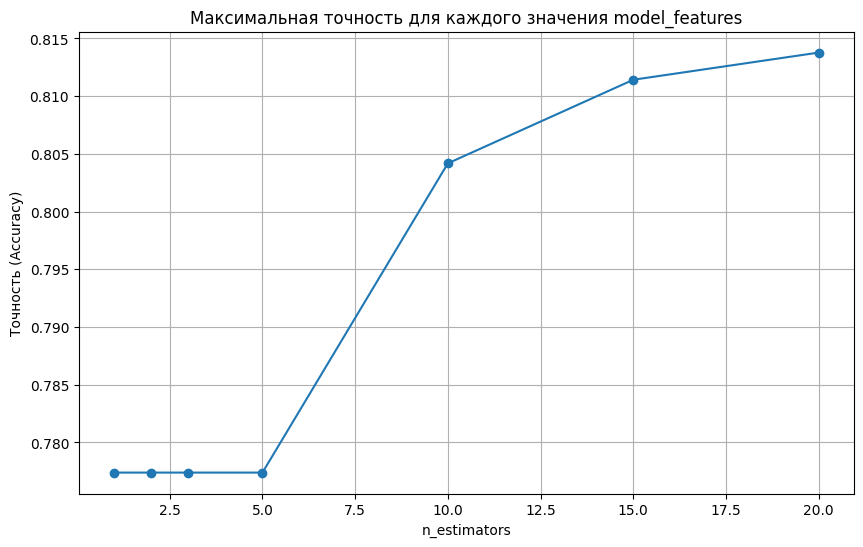

In [6]:
cv_results = grid_search.cv_results_

# Преобразуем результаты в DataFrame для удобства
results_df = pd.DataFrame(cv_results)

# Группировка по max_features и нахождение максимального значения accuracy
max_accuracy_per_max_features = results_df.groupby('param_gb_n_estimators')['mean_test_score'].max()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(max_accuracy_per_max_features.index, max_accuracy_per_max_features.values, marker='o')
plt.title('Максимальная точность для каждого значения model_features')
plt.xlabel('n_estimators')
plt.ylabel('Точность (Accuracy)')
plt.grid(True)
plt.show()

# Вырождение модели в случай одного дерева и сравнение с DecisionTreeClassifier

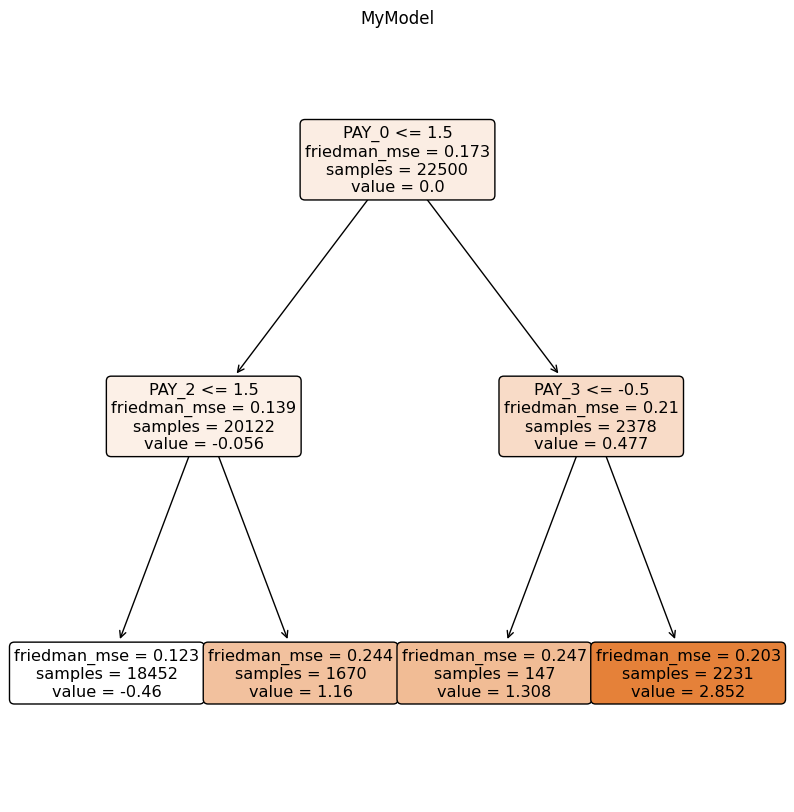

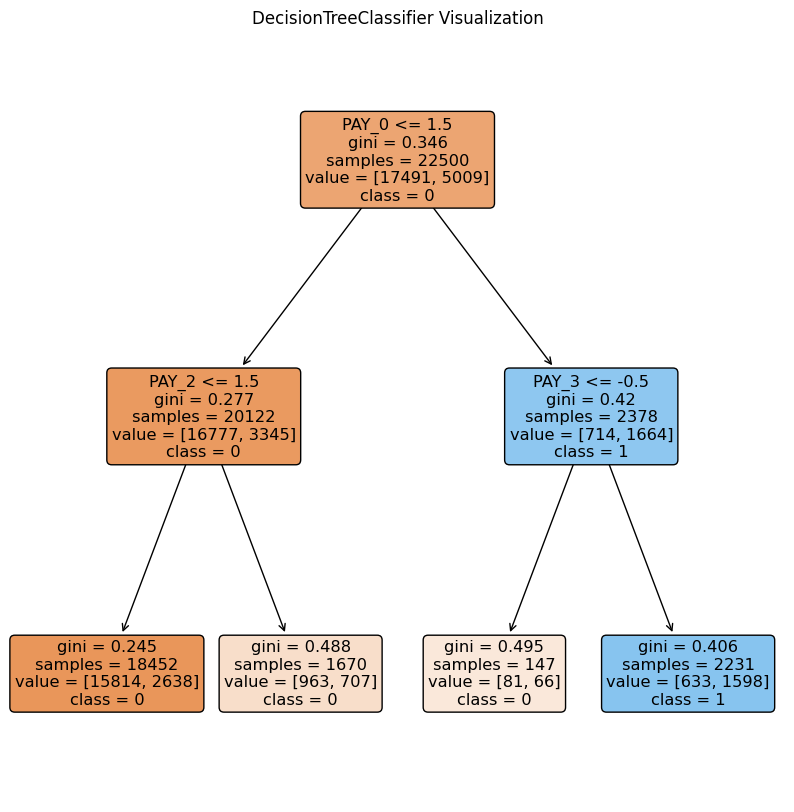

In [7]:
plt.figure(figsize=(10,10))
rbc = RandomBoostingClassifier( n_estimators  = 1 , gb_n_estimators = 1, learning_rate = 0.1, max_depth =  2, max_features =  1., bootstrap = False)  

rbc.fit(X_train, y_train)
selected_tree = rbc.estimators_[0].estimators_[0, 0] 
plot_tree(selected_tree, filled=True,feature_names=X_train.columns,  class_names=np.unique(y_train).astype(str), rounded=True) 
plt.title("MyModel")
plt.show()   




plt.figure(figsize=(10,10))
tree_clf = DecisionTreeClassifier(max_depth=2, max_features = 18, random_state=69) 
tree_clf.fit(X_train, y_train)
#tree_clf.fit(X_train_higgs.sample(frac=1, replace=True, random_state = 60), y_train_higgs.sample(frac=1, replace=True, random_state = 60))
plot_tree(tree_clf, filled=True, feature_names=X_train.columns, class_names= np.unique(y_train).astype(str), rounded=True) 
plt.title("DecisionTreeClassifier Visualization")
plt.show()   

# Сравнение с RandomForestClassifier

In [8]:
rf_model = RandomForestClassifier(n_estimators = 30, max_depth = 3, max_features = 1., bootstrap=False,  random_state=89)
rf_model.fit(X_train, y_train)
print('rf_accuracy: ', accuracy_score(y_test, rf_model.predict(X_test)) ) 

rb = RandomBoostingClassifier( n_estimators = 30 , gb_n_estimators = 1, learning_rate=1., max_depth =  3, 
                              max_features =  1., bootstrap = False, n_jobs = 30, random_state=89) 
rb.fit(X_train, y_train)
print('accuracy rb: ', accuracy_score( y_test, rb.predict(X_test)) )

rf_accuracy:  0.8205333333333333
accuracy rb:  0.8205333333333333


In [9]:
rb.estimators_

[BaseGradientBoostingClassifier(learning_rate=1.0, max_features=1.0,
                                n_estimators=1, random_state=2146170771),
 BaseGradientBoostingClassifier(learning_rate=1.0, max_features=1.0,
                                n_estimators=1, random_state=1665720606),
 BaseGradientBoostingClassifier(learning_rate=1.0, max_features=1.0,
                                n_estimators=1, random_state=1099241604),
 BaseGradientBoostingClassifier(learning_rate=1.0, max_features=1.0,
                                n_estimators=1, random_state=765119341),
 BaseGradientBoostingClassifier(learning_rate=1.0, max_features=1.0,
                                n_estimators=1, random_state=1108533782),
 BaseGradientBoostingClassifier(learning_rate=1.0, max_features=1.0,
                                n_estimators=1, random_state=1231164715),
 BaseGradientBoostingClassifier(learning_rate=1.0, max_features=1.0,
                                n_estimators=1, random_state=416275557),
 

# Сравнение с GradientBoostingClassifier

In [10]:
gb_model = GradientBoostingClassifier(n_estimators = 30, max_depth = 3, max_features = 1.,learning_rate=1.,  random_state=99)
gb_model.fit(X_train, y_train)
print('gb_accuracy: ', accuracy_score(y_test, gb_model.predict(X_test)) ) 

rb = RandomBoostingClassifier( n_estimators = 1 , gb_n_estimators = 30, learning_rate=1., max_depth =  3, 
                              max_features =  1., bootstrap = False, n_jobs = 30, random_state=99) 
rb.fit(X_train, y_train)
print('accuracy rb: ', accuracy_score( y_test, rb.predict(X_test)) )

gb_accuracy:  0.8113333333333334
accuracy rb:  0.8113333333333334


# feature importance

Accuracy of DecisionTree with max_depth=1: 0.5886
Accuracy of DecisionTree with max_depth=2: 0.5886


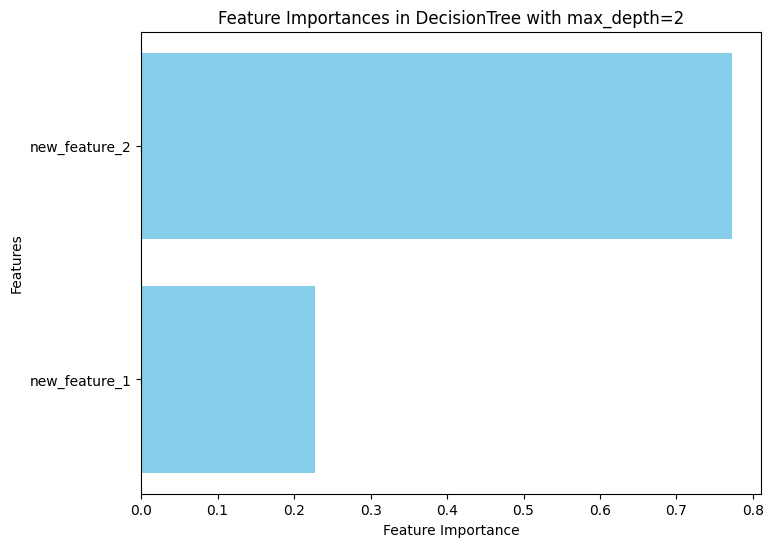

In [11]:
X = df_[['new_feature_1', 'new_feature_2']]
y = df_['default.payment.next.month']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_depth_1 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_depth_1.fit(X_train, y_train)
y_pred_1 = tree_depth_1.predict(X_test)


accuracy_1 = accuracy_score(y_test, y_pred_1)
print(f"Accuracy of DecisionTree with max_depth=1: {accuracy_1:.4f}")


tree_depth_2 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_depth_2.fit(X_train, y_train)
y_pred_2 = tree_depth_2.predict(X_test)


accuracy_2 = accuracy_score(y_test, y_pred_2)
print(f"Accuracy of DecisionTree with max_depth=2: {accuracy_2:.4f}")


importances = tree_depth_2.feature_importances_

plt.figure(figsize=(8, 6))
plt.barh(['new_feature_1', 'new_feature_2'], importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances in DecisionTree with max_depth=2')
plt.show()

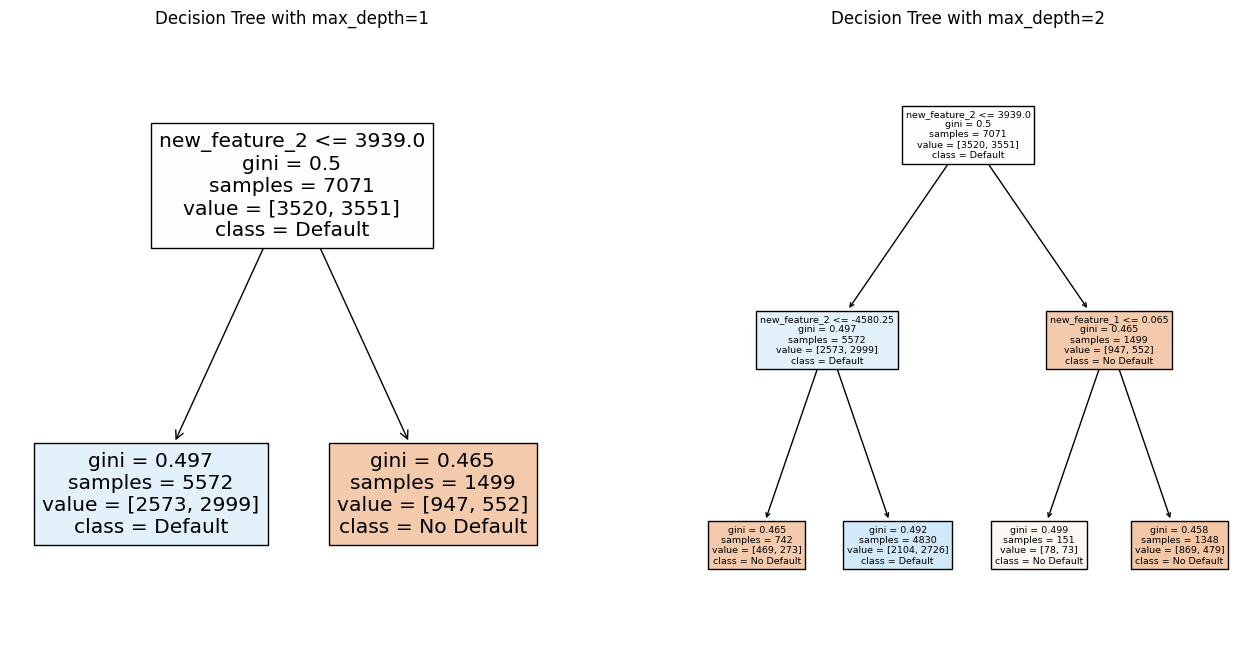

In [12]:
X = df_[['new_feature_1', 'new_feature_2', 'new_feature_1_2_equal_zero']]
y = df_['default.payment.next.month']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_depth_1 = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_depth_1.fit(X_train, y_train)


tree_depth_2 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_depth_2.fit(X_train, y_train)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plot_tree(tree_depth_1, filled=True, feature_names=['new_feature_1', 'new_feature_2'], class_names=['No Default', 'Default'])
plt.title("Decision Tree with max_depth=1")

plt.subplot(1, 2, 2)
plot_tree(tree_depth_2, filled=True, feature_names=['new_feature_1', 'new_feature_2'], class_names=['No Default', 'Default'])
plt.title("Decision Tree with max_depth=2")

plt.show()

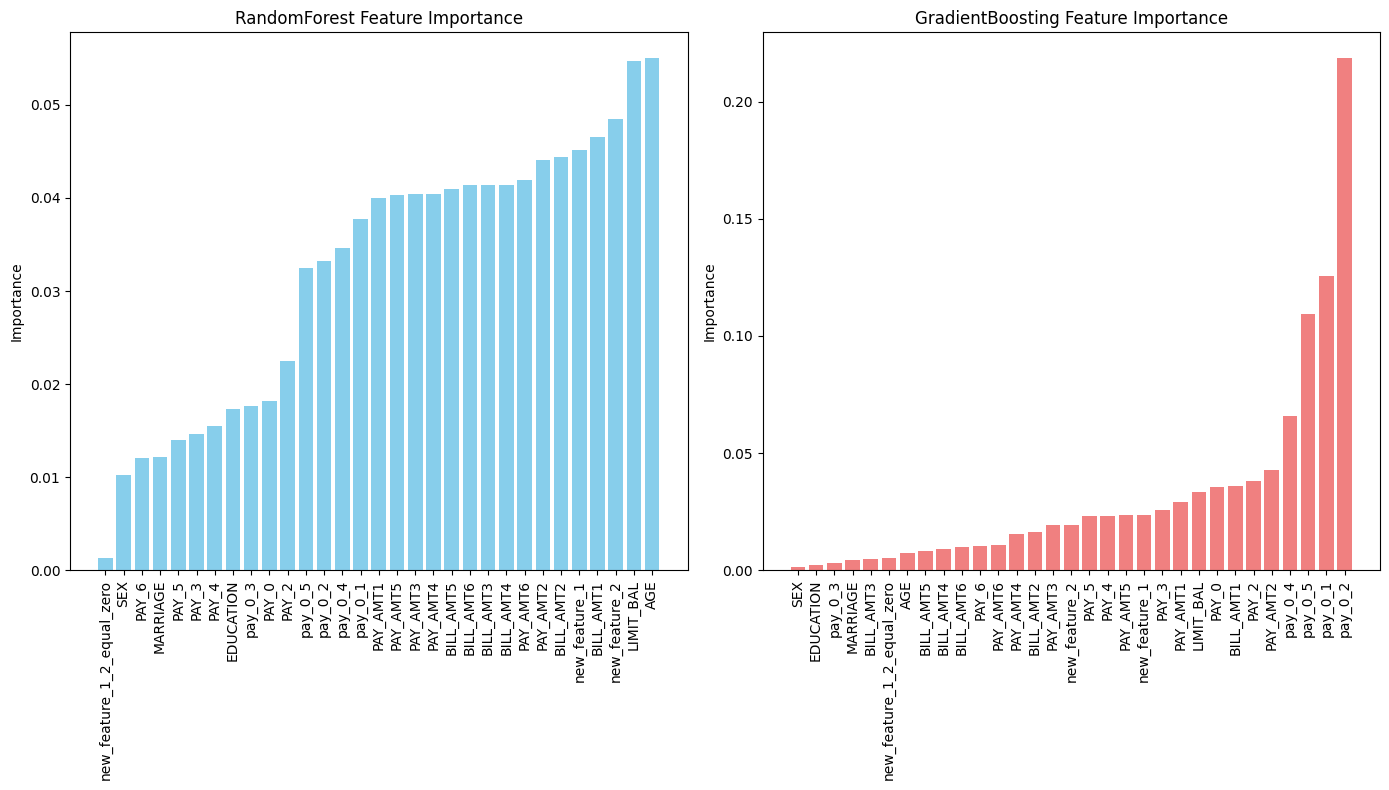

In [13]:
X = df_.drop(columns=['default.payment.next.month'])
y = df_['default.payment.next.month']

X['pay_0_1'] = X.apply(lambda x: x['PAY_0']*3, axis = 1)  
X['pay_0_2'] = X.apply(lambda x: x['PAY_0']/3+50, axis = 1)  
X['pay_0_3'] = X.apply(lambda x: x['PAY_0']*10-100, axis = 1) 
X['pay_0_4'] = X.apply(lambda x: x['pay_0_2'] + x['pay_0_3'], axis = 1) 
X['pay_0_5'] = X.apply(lambda x: x['pay_0_4']**2, axis = 1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
rf_importances = rf_model.feature_importances_
gb_importances = gb_model.feature_importances_

feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'RandomForest Importance': rf_importances,
    'GradientBoosting Importance': gb_importances})

importance_df_rf_sorted = importance_df.sort_values(by='RandomForest Importance', ascending=True)
importance_df_gb_sorted = importance_df.sort_values(by='GradientBoosting Importance', ascending=True)

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.bar(importance_df_rf_sorted['Feature'], importance_df_rf_sorted['RandomForest Importance'], color='skyblue')
plt.ylabel('Importance')
plt.title('RandomForest Feature Importance')
plt.xticks(rotation=90)  # Rotate feature names for better visibility

plt.subplot(1, 2, 2)
plt.bar(importance_df_gb_sorted['Feature'], importance_df_gb_sorted['GradientBoosting Importance'], color='lightcoral')
plt.ylabel('Importance')
plt.title('GradientBoosting Feature Importance')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

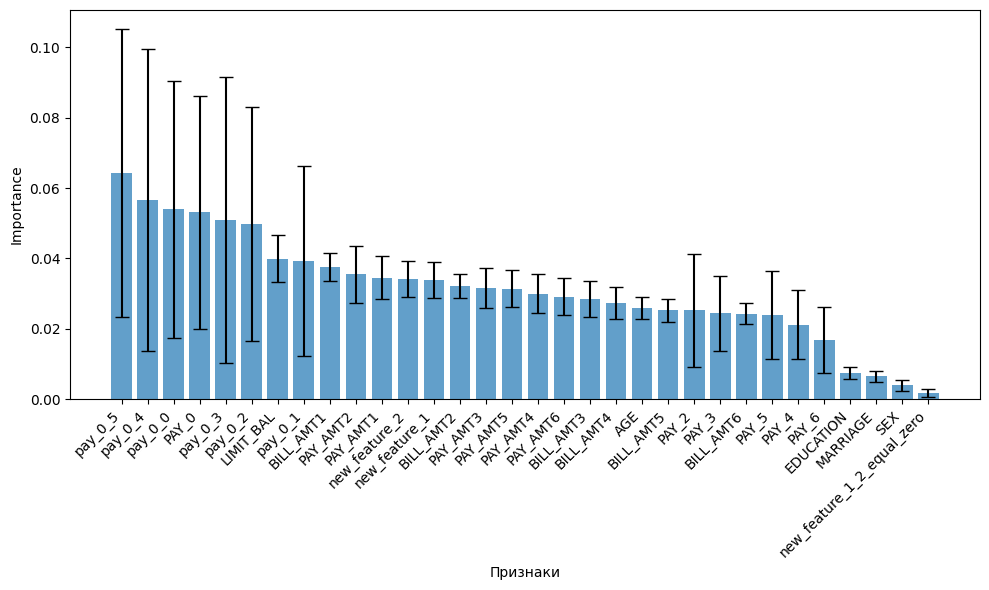

In [14]:
X = df_.drop(columns=['default.payment.next.month'])    
X['pay_0_0'] = X.apply(lambda x: x['PAY_0'], axis = 1)
X['pay_0_1'] = X.apply(lambda x: x['PAY_0']*3, axis = 1)  
X['pay_0_2'] = X.apply(lambda x: x['PAY_0']/3+50, axis = 1)  
X['pay_0_3'] = X.apply(lambda x: x['PAY_0']*10-100, axis = 1) 
X['pay_0_4'] = X.apply(lambda x: x['pay_0_2'] + x['pay_0_3'], axis = 1) 
X['pay_0_5'] = X.apply(lambda x: x['pay_0_4']**2, axis = 1) 

y = df_['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rb = RandomBoostingClassifier( n_estimators  = 30 , gb_n_estimators = 20, learning_rate = 0.1, max_depth =  7, max_features =  'sqrt', n_jobs = 30)   

rb.fit(X_train, y_train)
features = rb.feature_names_in_
importances = rb.feature_importances_
variances =  rb.feature_importances_var_

stds = np.sqrt(variances)
sorted_indices = np.argsort(importances)[::-1]
sorted_features = features[sorted_indices]
sorted_importances = importances[sorted_indices]
sorted_stds = stds[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), sorted_importances, yerr=sorted_stds, capsize=5, align='center', alpha=0.7)
plt.xticks(range(len(sorted_features)), sorted_features, rotation=45, ha="right")
plt.xlabel('Признаки')
plt.ylabel('Importance')

plt.tight_layout()
plt.show()

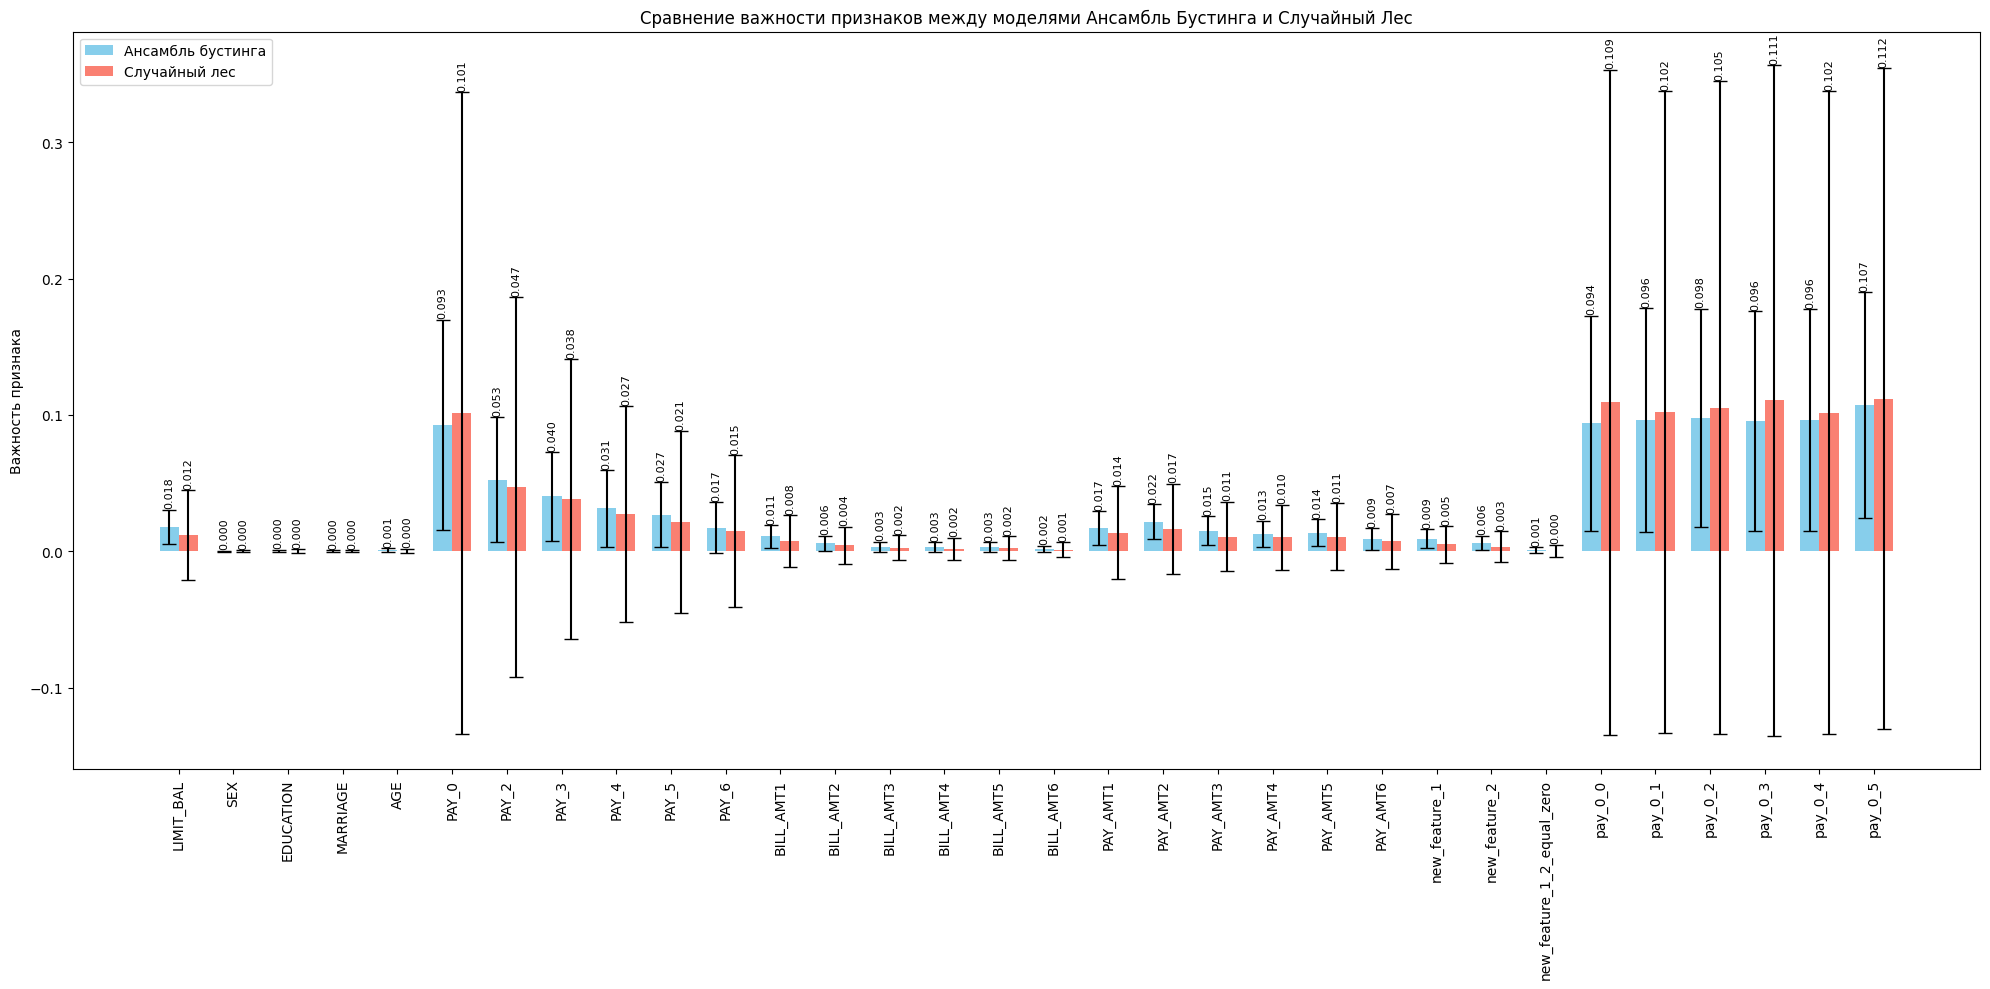

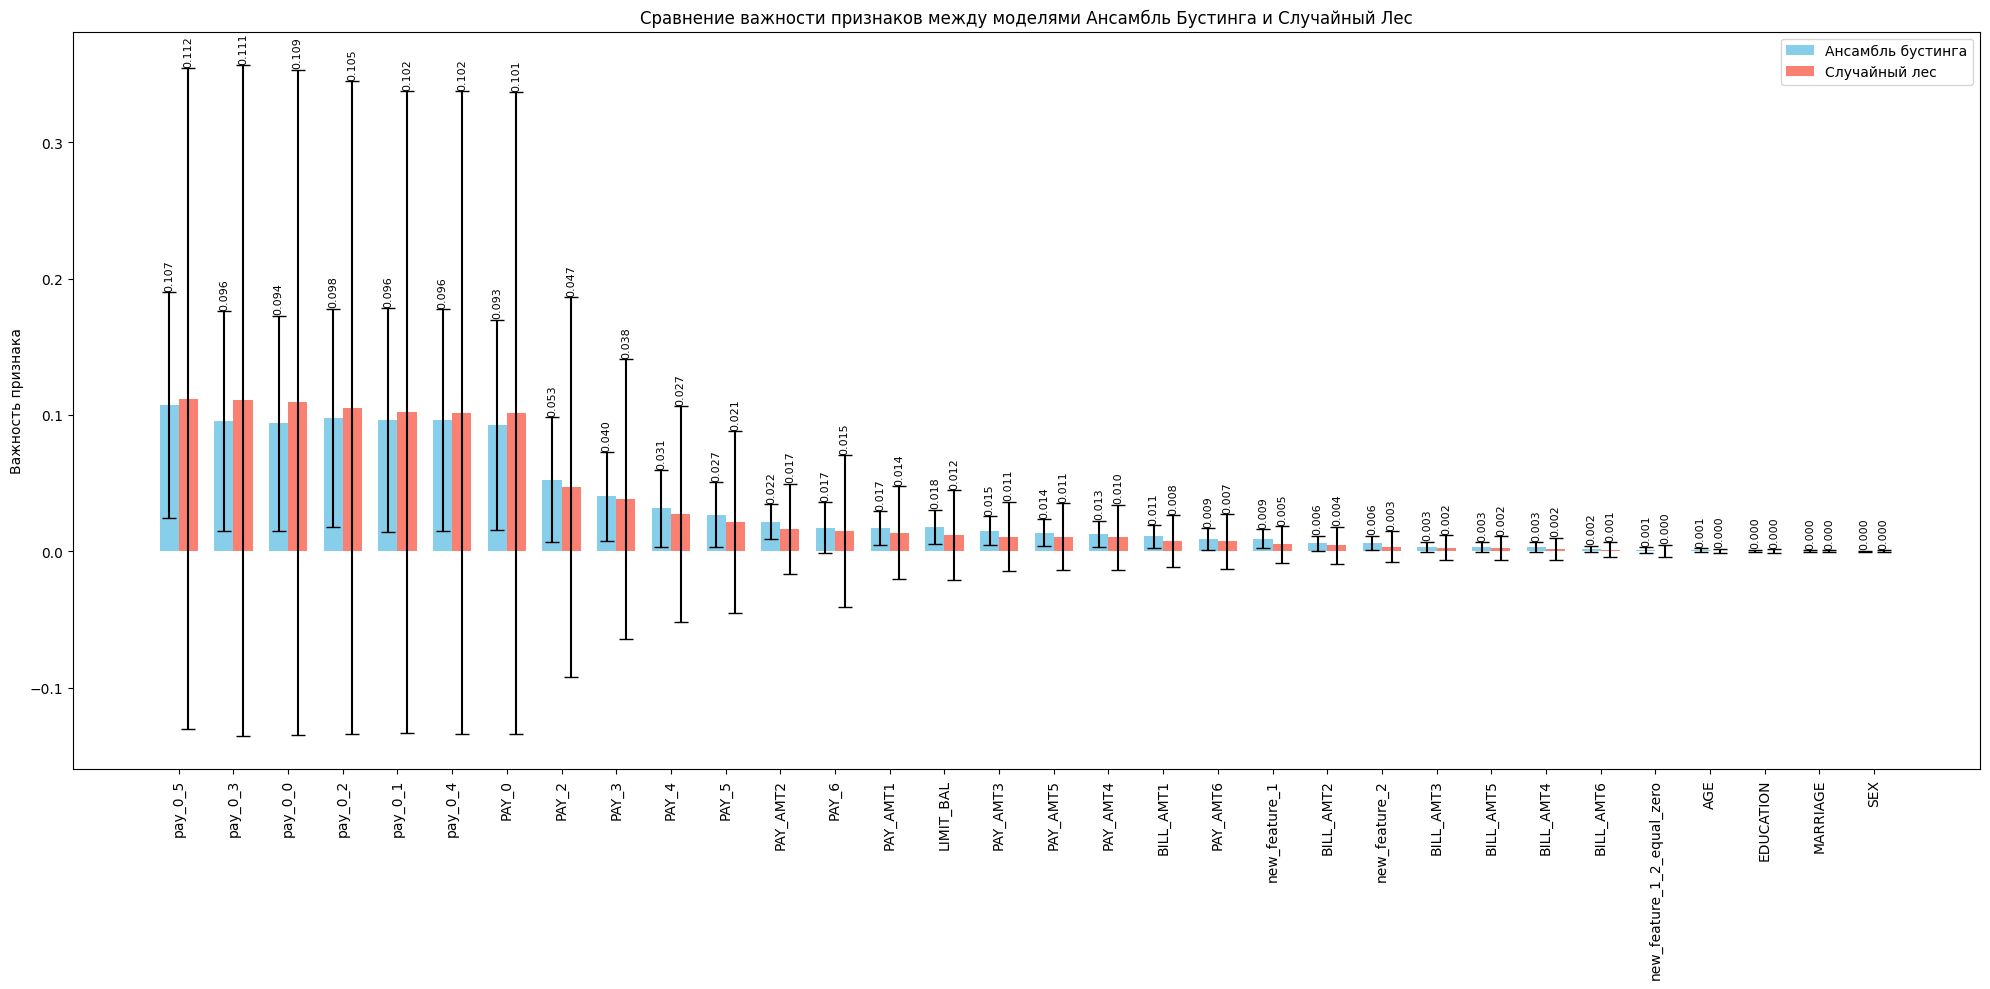

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Предполагается, что RandomBoostingClassifier уже импортирован или определен
# Созание дополнительных признаков
X = df_.drop(columns=['default.payment.next.month'])    
X['pay_0_0'] = X['PAY_0']
X['pay_0_1'] = X['PAY_0'] * 3
X['pay_0_2'] = X['PAY_0'] / 3 + 50
X['pay_0_3'] = X['PAY_0'] * 10 - 100
X['pay_0_4'] = X['pay_0_2'] + X['pay_0_3']
X['pay_0_5'] = X['pay_0_4'] ** 2

y = df_['default.payment.next.month']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Обучение ансамбля бустинга
rb = RandomBoostingClassifier(n_estimators=3600,  gb_n_estimators=10, learning_rate=0.1, max_depth=3, max_features='sqrt', n_jobs=30)   
rb.fit(X_train, y_train)
features = rb.feature_names_in_
importances_rb = rb.feature_importances_
variances_rb = rb.feature_importances_var_
stds_rb = np.sqrt(variances_rb)
# Обучение модели случайного леса
rf = RandomForestClassifier(n_estimators=6000, max_depth=3, max_features='sqrt', n_jobs=30, random_state=42)
rf.fit(X_train, y_train)
importances_rf_mean = rf.feature_importances_
importances_rf_all = np.array([tree.feature_importances_ for tree in rf.estimators_])
importances_rf = importances_rf_all.mean(axis=0)
variances_rf = importances_rf_all.var(axis=0)
stds_rf = np.sqrt(variances_rf) 

# Убедимся, что порядок признаков совпадает
assert list(features) == list(X.columns), "Порядок признаков не совпадает!"
# Создание позиции для каждого признака
x = np.arange(len(features))  # позиция на оси x
width = 0.35  # ширина баров
fig, ax = plt.subplots(figsize=(20, 10))
# Бар для ансамбля бустинга
bars_rb = ax.bar( x - width/2, importances_rb, width, yerr=stds_rb, label='Ансамбль бустинга', capsize=5, color='skyblue')

# Бар для случайного леса
bars_rf = ax.bar(x + width/2, importances_rf, width, yerr=stds_rf, label='Случайный лес', capsize=5, color='salmon')

# Добавление подписей и заголовка
ax.set_ylabel('Важность признака')
ax.set_title('Сравнение важности признаков между моделями Ансамбль Бустинга и Случайный Лес')
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=90)
ax.legend()

# Добавление значений важностей над столбцами
for i in range(len(features)):
    # Значения для Ансамбля бустинга
    ax.text(
        x[i] - width/2, 
        importances_rb[i] + stds_rb[i] + 0.001, 
        f"{importances_rb[i]:.3f}", 
        ha='center', va='bottom', fontsize=8, rotation=90
    )
    # Значения для Случайного леса
    ax.text(
        x[i] + width/2, 
        importances_rf[i] + stds_rf[i] + 0.001, 
        f"{importances_rf[i]:.3f}", 
        ha='center', va='bottom', fontsize=8, rotation=90
    )

plt.tight_layout()
plt.show()

# Создание DataFrame для удобства сортировки
importance_df = pd.DataFrame({
    'Feature': features,
    'Boosting': importances_rb,
    'Boosting_std': stds_rb,
    'RandomForest': importances_rf,
    'RandomForest_std': stds_rf
})

# Сортировка по важности ансамбля бустинга
importance_df = importance_df.sort_values(by='RandomForest', ascending=False)

# Обновление порядка признаков
sorted_features = importance_df['Feature'].values
importances_rb_sorted = importance_df['Boosting'].values
stds_rb_sorted = importance_df['Boosting_std'].values
importances_rf_sorted = importance_df['RandomForest'].values
stds_rf_sorted = importance_df['RandomForest_std'].values

# Обновление позиции на оси x
x_sorted = np.arange(len(sorted_features))

# Переотрисовка графика с отсортированными признаками
fig, ax = plt.subplots(figsize=(20, 10))

# Бар для ансамбля бустинга
bars_rb = ax.bar(
    x_sorted - width/2, importances_rb_sorted, width, yerr=stds_rb_sorted,
    label='Ансамбль бустинга', capsize=5, color='skyblue'
)

# Бар для случайного леса
bars_rf = ax.bar(
    x_sorted + width/2, importances_rf_sorted, width, yerr=stds_rf_sorted,
    label='Случайный лес', capsize=5, color='salmon'
)

# Добавление подписей и заголовка
ax.set_ylabel('Важность признака')
ax.set_title('Сравнение важности признаков между моделями Ансамбль Бустинга и Случайный Лес')
ax.set_xticks(x_sorted)
ax.set_xticklabels(sorted_features, rotation=90)
ax.legend()

# Добавление значений важностей над и под столбцами
for i in range(len(sorted_features)):
    ax.text(
        x_sorted[i] - width/2, 
        importances_rb_sorted[i] + stds_rb_sorted[i] + 0.001, 
        f"{importances_rb_sorted[i]:.3f}", 
        ha='center', va='bottom', fontsize=8, rotation=90
    )
    ax.text(
        x_sorted[i] + width/2, 
        importances_rf_sorted[i] + stds_rf_sorted[i] + 0.001, 
        f"{importances_rf_sorted[i]:.3f}", 
        ha='center', va='bottom', fontsize=8, rotation=90
    )

plt.tight_layout()
plt.show()


0.001946094761169079


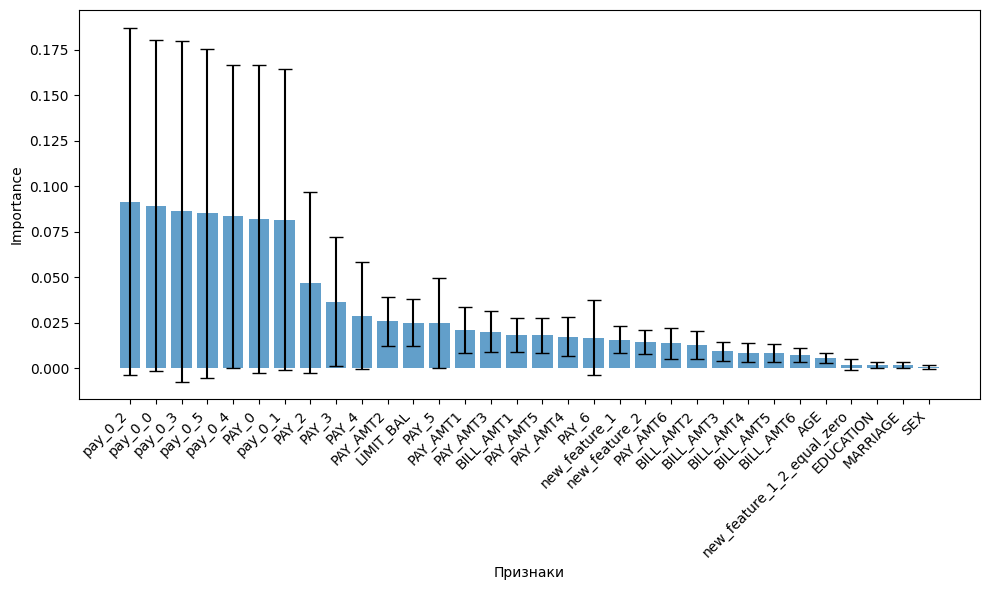

In [75]:
X = df_.drop(columns=['default.payment.next.month'])    
X['pay_0_0'] = X.apply(lambda x: x['PAY_0'], axis = 1)
X['pay_0_1'] = X.apply(lambda x: x['PAY_0']*3, axis = 1)  
X['pay_0_2'] = X.apply(lambda x: x['PAY_0']/3+50, axis = 1)  
X['pay_0_3'] = X.apply(lambda x: x['PAY_0']*10-100, axis = 1) 
X['pay_0_4'] = X.apply(lambda x: x['pay_0_2'] + x['pay_0_3'], axis = 1) 
X['pay_0_5'] = X.apply(lambda x: x['pay_0_4']**2, axis = 1) 

y = df_['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rb = RandomBoostingClassifier( n_estimators  =  360, gb_n_estimators = 5, learning_rate = 0.1, max_depth =  5, max_features =  'sqrt', n_jobs = 30)   

rb.fit(X_train, y_train)
features = rb.feature_names_in_
importances = rb.feature_importances_
variances =  rb.feature_importances_var_
print(np.mean(variances))

stds = np.sqrt(variances)
sorted_indices = np.argsort(importances)[::-1]
sorted_features = features[sorted_indices]
sorted_importances = importances[sorted_indices]
sorted_stds = stds[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), sorted_importances, yerr=sorted_stds, capsize=5, align='center', alpha=0.7)
plt.xticks(range(len(sorted_features)), sorted_features, rotation=45, ha="right")
plt.xlabel('Признаки')
plt.ylabel('Importance')

plt.tight_layout()
plt.show()

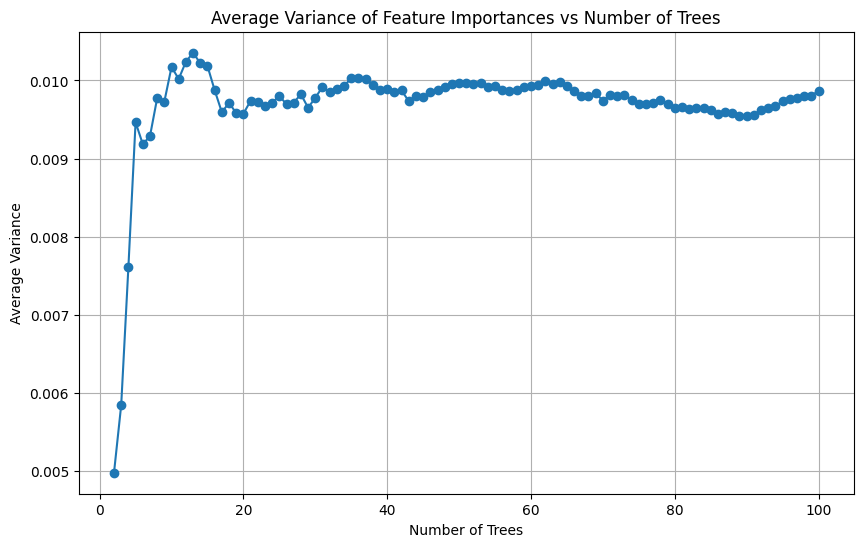

In [84]:
X = df_.drop(columns=['default.payment.next.month'])    
X['pay_0_0'] = X.apply(lambda x: x['PAY_0'], axis=1)
X['pay_0_1'] = X.apply(lambda x: x['PAY_0'] * 3, axis=1)  
X['pay_0_2'] = X.apply(lambda x: x['PAY_0'] / 3 + 50, axis=1)  
X['pay_0_3'] = X.apply(lambda x: x['PAY_0'] * 10 - 100, axis=1) 
X['pay_0_4'] = X.apply(lambda x: x['pay_0_2'] + x['pay_0_3'], axis=1) 
X['pay_0_5'] = X.apply(lambda x: x['pay_0_4']**2, axis=1) 

y = df_['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
n_estimators_range = list(range(2,101))
avg_variances = []

for n_estimators in n_estimators_range: 
    #print(n_estimators )
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth =  5, random_state=69, n_jobs = 30)
    rf.fit(X_train, y_train)
    variances = np.var([tree.feature_importances_ for tree in rf.estimators_], axis=0)
    avg_variances.append(np.mean(variances))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, avg_variances, marker='o')
plt.title('Average Variance of Feature Importances vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Average Variance')
plt.grid(True)
plt.show()

Анализ для gb_n_estimators=1
  n_estimators=1, average variance=0.015699
  n_estimators=2, average variance=0.007978
  n_estimators=3, average variance=0.005447
  n_estimators=4, average variance=0.004019
  n_estimators=5, average variance=0.002850
  n_estimators=7, average variance=0.001665
  n_estimators=10, average variance=0.001267
  n_estimators=20, average variance=0.000862
  n_estimators=30, average variance=0.000534
  n_estimators=60, average variance=0.000267

Анализ для gb_n_estimators=2
  n_estimators=1, average variance=0.008405
  n_estimators=2, average variance=0.004018
  n_estimators=3, average variance=0.003467
  n_estimators=4, average variance=0.002146
  n_estimators=5, average variance=0.001673
  n_estimators=7, average variance=0.000967
  n_estimators=10, average variance=0.000678
  n_estimators=20, average variance=0.000446
  n_estimators=30, average variance=0.000254
  n_estimators=60, average variance=0.000155

Анализ для gb_n_estimators=10
  n_estimators=1, aver

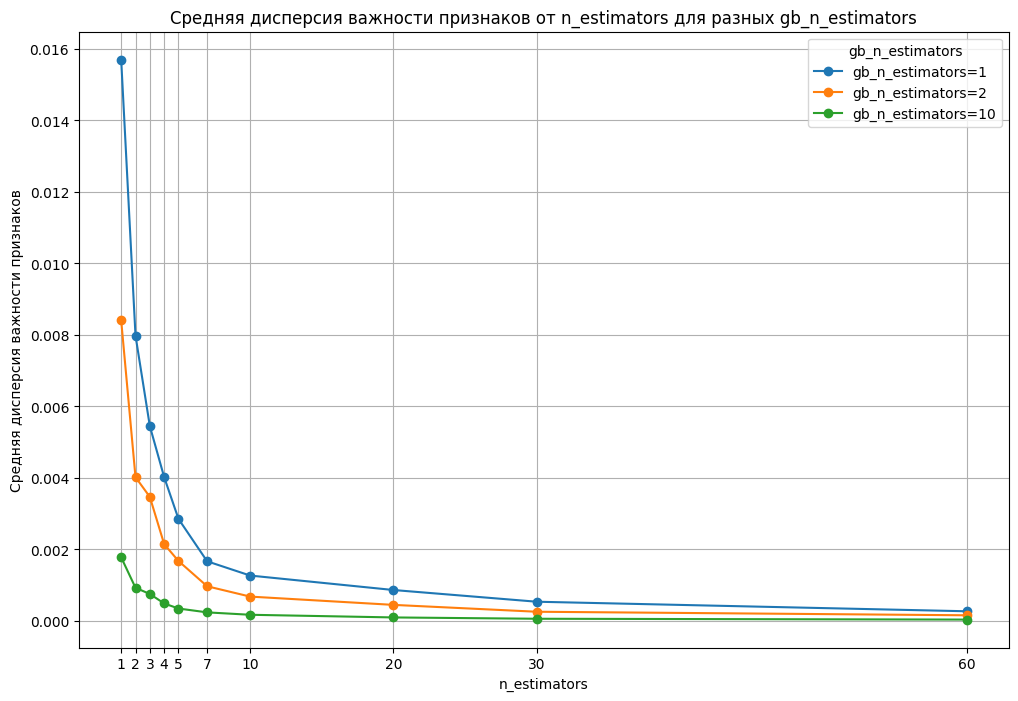

In [23]:
X = df_.drop(columns=['default.payment.next.month'])    
X['pay_0_0'] = X['PAY_0']
X['pay_0_1'] = X['PAY_0'] * 3
X['pay_0_2'] = X['PAY_0'] / 3 + 50
X['pay_0_3'] = X['PAY_0'] * 10 - 100
X['pay_0_4'] = X['pay_0_2'] + X['pay_0_3']
X['pay_0_5'] = X['pay_0_4'] ** 2
y = df_['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_estimators_list = [1,2,3,4,5,7,10, 20,30,60]     
gb_n_estimators_list = [1, 2, 10]      
random_seeds = range(10)                    

average_variances = {gb_n: [] for gb_n in gb_n_estimators_list}
initial_rb = RandomBoostingClassifier()
initial_rb.fit(X_train, y_train)
features = initial_rb.feature_names_in_
for gb_n in gb_n_estimators_list:
    for n_estimators in n_estimators_list:
        importances_matrix = []
        for seed in random_seeds:
            rb = RandomBoostingClassifier(
                n_estimators=n_estimators,
                gb_n_estimators=gb_n,
                learning_rate=0.1,
                max_depth=2,
                max_features='sqrt',
                n_jobs=30,
                random_state=seed) 
            
            rb.fit(X_train, y_train)
            importances = rb.feature_importances_
            importances_matrix.append(importances)
        importances_matrix = np.array(importances_matrix)
        variances = np.var(importances_matrix, axis=0)
        average_variance = np.mean(variances)
        average_variances[gb_n].append(average_variance)


variance_df = pd.DataFrame(average_variances, index=n_estimators_list).reset_index()
variance_df = variance_df.rename(columns={'index': 'n_estimators'})

plt.figure(figsize=(12, 8))
for gb_n in gb_n_estimators_list:
    plt.plot( variance_df['n_estimators'], variance_df[gb_n], marker='o', label=f'gb_n_estimators={gb_n}')

plt.title('Средняя дисперсия важности признаков от n_estimators для разных gb_n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Средняя дисперсия важности признаков')
plt.xticks(n_estimators_list)
plt.legend(title='gb_n_estimators')
plt.grid(True)
plt.show()


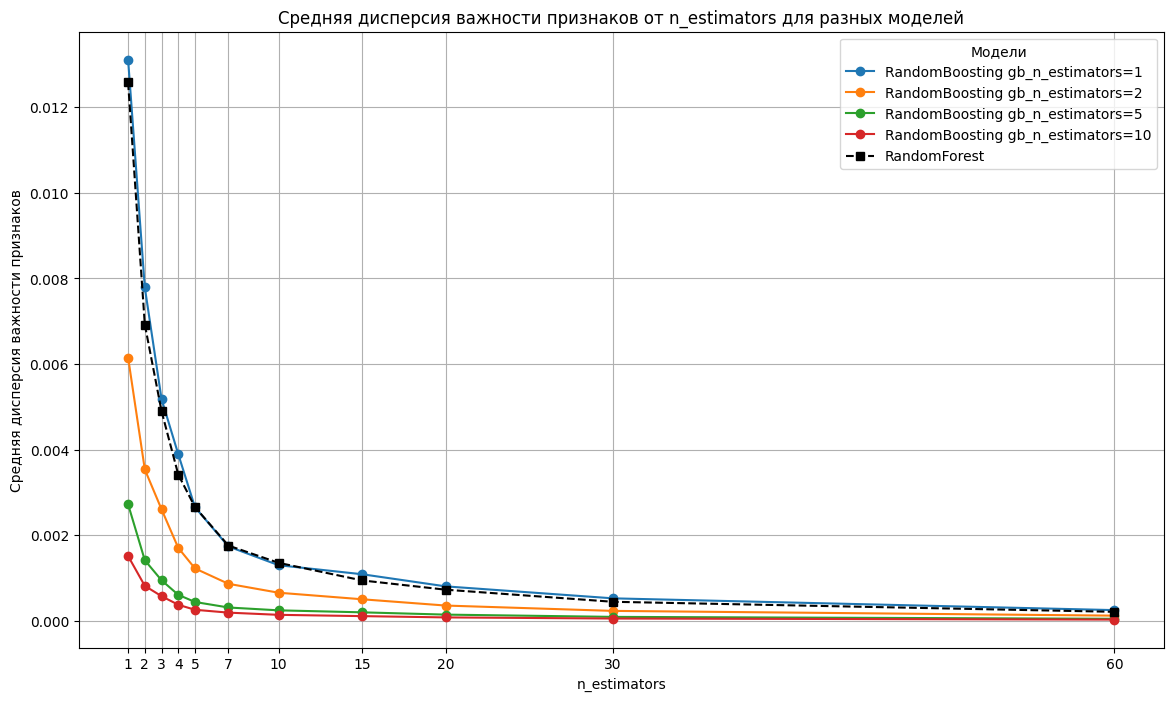

In [33]:
X = df_.drop(columns=['default.payment.next.month'])    
X['pay_0_0'] = X['PAY_0']
X['pay_0_1'] = X['PAY_0'] * 3
X['pay_0_2'] = X['PAY_0'] / 3 + 50
X['pay_0_3'] = X['PAY_0'] * 10 - 100
X['pay_0_4'] = X['pay_0_2'] + X['pay_0_3']
X['pay_0_5'] = X['pay_0_4'] ** 2

y = df_['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
n_estimators_list = [1, 2, 3, 4, 5, 7, 10,15, 20, 30, 60]     
gb_n_estimators_list = [1, 2, 5, 10]      
random_seeds = range(20) 

average_variances = {gb_n: [] for gb_n in gb_n_estimators_list}
average_variances['RandomForest'] = []  

initial_rb = RandomBoostingClassifier()
initial_rb.fit(X_train, y_train)
features = initial_rb.feature_names_in_

for gb_n in gb_n_estimators_list:
    for n_estimators in n_estimators_list:
        importances_matrix = []
        for seed in random_seeds:
            rb = RandomBoostingClassifier(
                n_estimators=n_estimators,
                gb_n_estimators=gb_n,
                learning_rate=0.1,
                max_depth=3,
                max_features='sqrt',
                n_jobs=30,
                random_state=seed) 
            
            rb.fit(X_train, y_train)
            importances = rb.feature_importances_
            importances_matrix.append(importances)
        
        importances_matrix = np.array(importances_matrix)
        variances = np.var(importances_matrix, axis=0)
        average_variance = np.mean(variances)
        average_variances[gb_n].append(average_variance)

for n_estimators in n_estimators_list:
    importances_matrix = []
    for seed in random_seeds:
        rf = RandomForestClassifier(
            n_estimators=n_estimators,
            random_state=seed,
            max_depth=3,        
            max_features='sqrt',      
            n_jobs=30
        )
        
        rf.fit(X_train, y_train)
        importances = rf.feature_importances_
        importances_matrix.append(importances)
    
    importances_matrix = np.array(importances_matrix)
    variances = np.var(importances_matrix, axis=0)
    average_variance = np.mean(variances)
    average_variances['RandomForest'].append(average_variance)

variance_df = pd.DataFrame(average_variances, index=n_estimators_list).reset_index()
variance_df = variance_df.rename(columns={'index': 'n_estimators'})
plt.figure(figsize=(14, 8))
for gb_n in gb_n_estimators_list:
    plt.plot( variance_df['n_estimators'], variance_df[gb_n], marker='o', linestyle='-', label=f'RandomBoosting gb_n_estimators={gb_n}'    )
plt.plot( variance_df['n_estimators'], variance_df['RandomForest'], marker='s', linestyle='--', color='black', label='RandomForest')
plt.title('Средняя дисперсия важности признаков от n_estimators для разных моделей')
plt.xlabel('n_estimators')
plt.ylabel('Средняя дисперсия важности признаков')
plt.xticks(n_estimators_list)
plt.legend(title='Модели')
plt.grid(True)
plt.show()